In [2]:
from fastai.vision.all import *
from fastai.vision.gan import *
from fastai.metrics import error_rate, accuracy

data_path = Path("./Smiles/")
size = 16

In [ ]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])))

data = dblock.dataloaders(data_path, path=data_path, bs=10)
data.show_batch(max_n=16)

In [4]:
generator = basic_generator(size, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (size, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

gan = GANLearner.wgan(data, generator, critic, opt_func = RMSProp)

In [7]:
gan.load("smilegan")

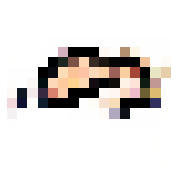

In [26]:
gan.show_results(max_n=1, ds_idx=0, show=True)